In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from itertools import combinations

In [3]:
raw_df = pd.read_excel('RFLFSODataFull.xlsx')

In [4]:
raw_df

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.000000,0.000000,0.000000,...,26.603030,24.680849,9,65884.518460,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.000000,0.000000,0.000000,...,26.377164,24.313108,9,64963.410920,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.000000,0.000000,0.000000,...,27.670822,23.150277,10,54794.281070,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.000000,0.000000,0.000000,...,26.522100,23.174815,10,50205.641590,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.000000,0.000000,0.000000,...,26.305736,24.864100,10,59038.325990,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91374,9.150012,11.968291,23.283256,24.142871,22.169805,3970.846129,83500000000,0.000000,0.000000,0.000000,...,27.257926,26.013205,4,13041.847800,13458.340663,12411.852994,91.391749,0.000000,0.027596,0.000000
91375,9.333777,11.538030,23.259618,25.104895,21.005496,3969.230652,73500000000,0.000000,0.000000,0.000000,...,28.101044,25.032282,4,15959.633590,16232.735439,15345.485232,47.997946,0.075640,0.349551,0.069834
91376,8.873168,11.491891,23.331697,23.996130,22.148649,3968.373512,83500000000,0.000000,0.000000,0.000000,...,28.249678,26.205773,4,13129.663750,13948.560177,11925.979953,103.963102,0.052282,0.178062,0.049824
91377,9.538886,11.526529,21.241027,21.624932,20.736391,3967.550165,73500000000,29.693160,30.761540,28.497137,...,26.880084,25.031934,5,15082.787860,15522.762221,14842.654291,82.090779,0.443520,1.838449,0.413146


In [5]:
raw_df.describe(include='all') # Summary statistics

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
count,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,9.137900e+04,91379.000000,91379.000000,91379.000000,...,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000
mean,6.769458,11.619098,9.553919,10.032760,9.076251,3297.930328,7.850005e+10,27.065979,28.417120,25.717089,...,13.166020,11.904558,11.373193,32986.417484,34636.684647,31331.618978,89.043304,0.739065,1.851020,0.702242
std,3.903843,3.438873,5.858577,6.162798,5.575927,1224.305893,5.000027e+09,72.134023,75.761896,68.595239,...,9.589755,8.694028,6.942229,24713.874445,25978.845228,23497.873065,26.415610,0.871314,1.762698,0.828796
min,0.788363,0.027142,1.141556,1.238270,1.049744,2012.000148,7.350000e+10,0.000000,0.000000,0.000000,...,-6.693373,-7.270075,0.000000,10.151990,11.029667,9.484346,0.000000,0.000000,0.000000,0.000000
25%,3.473063,10.829331,4.958993,5.205861,4.709511,2019.431812,7.350000e+10,0.000000,0.000000,0.000000,...,4.905387,4.438425,5.000000,11158.598400,11721.447542,10588.793237,82.976727,0.076749,0.512667,0.072912
50%,6.336167,11.856560,6.870737,7.205499,6.524046,2959.863686,8.350000e+10,0.000000,0.000000,0.000000,...,10.803943,9.774467,11.000000,26378.636210,27686.214032,25047.188462,90.867362,0.437995,1.323101,0.416274
75%,8.664984,12.847944,14.049470,14.782679,13.379256,4820.890157,8.350000e+10,16.947618,17.775980,16.038090,...,22.470382,20.322434,17.000000,53493.821285,56092.212376,50797.690402,98.482652,1.088621,2.681788,1.036574
max,32.455222,46.893150,24.790883,26.407305,24.268431,4827.999971,8.350000e+10,1621.001906,1753.747866,1500.666382,...,40.771383,36.724191,23.000000,75004.999150,82503.130084,74999.343414,360.000000,7.799086,16.421115,7.252319


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91379 entries, 0 to 91378
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FSO_Att                91379 non-null  float64
 1   RFL_Att                91379 non-null  float64
 2   AbsoluteHumidity       91379 non-null  float64
 3   AbsoluteHumidityMax    91379 non-null  float64
 4   AbsoluteHumidityMin    91379 non-null  float64
 5   Distance               91379 non-null  float64
 6   Frequency              91379 non-null  int64  
 7   Particulate            91379 non-null  float64
 8   ParticulateMax         91379 non-null  float64
 9   ParticulateMin         91379 non-null  float64
 10  RainIntensity          91379 non-null  float64
 11  RainIntensityMax       91379 non-null  float64
 12  RainIntensityMin       91379 non-null  float64
 13  RelativeHumidity       91379 non-null  float64
 14  SYNOPCode              91379 non-null  int64  
 15  Te

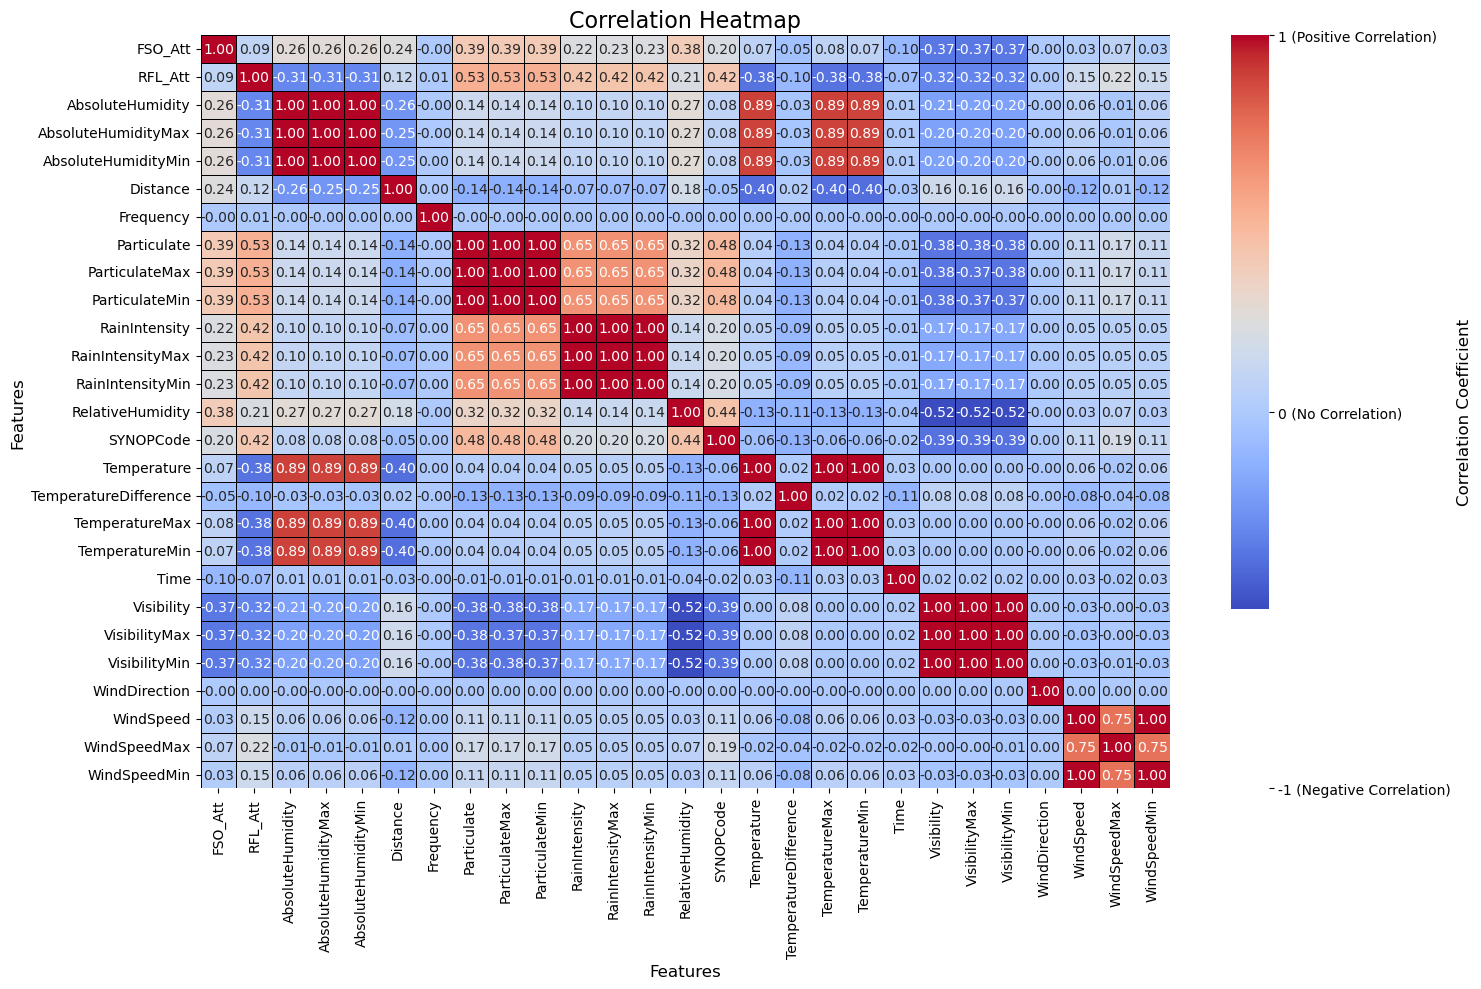

In [7]:
# Compute correlation matrix
correlation_matrix = raw_df.corr()

# Set up the plot
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,  # Show correlation values
    fmt=".2f",  # Format values to two decimal points
    cmap="coolwarm",  # Blue for negative, red for positive
    linewidths=0.5,  # Add grid lines
    linecolor='black',  # Grid line color
)

# Add title and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add a color bar explanation
cbar = heatmap.collections[0].colorbar
cbar.ax.set_ylabel('Correlation Coefficient', fontsize=12)
cbar.set_ticks([-1, 0, 1])  # Set ticks
cbar.set_ticklabels(['-1 (Negative Correlation)', '0 (No Correlation)', '1 (Positive Correlation)'])

plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()

In [8]:
rfl_df = raw_df.drop(columns=['FSO_Att']) # 1. Dataset excluding "FSO_Att"

In [9]:
def feature_selection_algorithm(data, target_variable):
    """
    Implement the given algorithm for feature selection.
    
    Parameters:
        data (pd.DataFrame): The dataset containing features and the target variable.
        target_variable (str): The name of the target variable column.
        
    Returns:
        pd.DataFrame: A table containing the removed feature, RMSE, and R^2 values.
    """
    # Separate features and target variable
    X = data.drop(columns=[target_variable])
    y = data[target_variable]
    
    # Initialize an empty table R
    R = []
    
    # List of predictor variables S
    S = list(X.columns)
    
    while S:
        # Train a Random Forest model using the features in S
        rf = RandomForestRegressor(random_state=42, oob_score=True)
        rf.fit(X[S], y)
        
        # Calculate RMSE and R^2 values
        y_pred = rf.oob_prediction_
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        r2 = r2_score(y, y_pred)
        
        # Get feature importances
        feature_importances = rf.feature_importances_
        
        # Identify the least important predictor
        least_important_index = np.argmin(feature_importances)
        least_important_feature = S[least_important_index]
        
        # Add the removed feature and its metrics to the table
        R.append((least_important_feature, rmse, r2))
        
        # Remove the least important feature from S
        S.pop(least_important_index)
    
    # Convert the results to a DataFrame
    results_df = pd.DataFrame(R, columns=["Removed Feature", "RMSE", "R2"])
    
    # Print the entire table
    print("Feature Removal Table with RMSE and R2 values:")
    print(results_df)
    
    # Get the top 10 important features
    top_features = results_df.tail(10)
    
    # Print the top 10 important features
    print("\nTop 10 Important Features:")
    print(top_features)
    
    return results_df

# Example usage:
# Assuming `data` is your dataset and 'RFL_Att' is the target variable
results = feature_selection_algorithm(rfl_df, target_variable='RFL_Att')


Feature Removal Table with RMSE and R2 values:
          Removed Feature      RMSE        R2
0           WindDirection  0.482323  0.980328
1            WindSpeedMin  0.478351  0.980651
2               WindSpeed  0.479894  0.980526
3             Particulate  0.477745  0.980700
4            WindSpeedMax  0.479933  0.980522
5     AbsoluteHumidityMax  0.475946  0.980845
6          TemperatureMin  0.470147  0.981309
7           VisibilityMin  0.464375  0.981765
8     AbsoluteHumidityMin  0.463689  0.981819
9          ParticulateMin  0.453098  0.982640
10  TemperatureDifference  0.453737  0.982591
11          VisibilityMax  0.479523  0.980556
12                   Time  0.475262  0.980900
13              Frequency  0.549782  0.974440
14         TemperatureMax  0.717153  0.956509
15         ParticulateMax  0.713822  0.956912
16       RelativeHumidity  0.716826  0.956549
17              SYNOPCode  0.728179  0.955162
18             Visibility  0.729892  0.954951
19       RainIntensityMin  0.8504

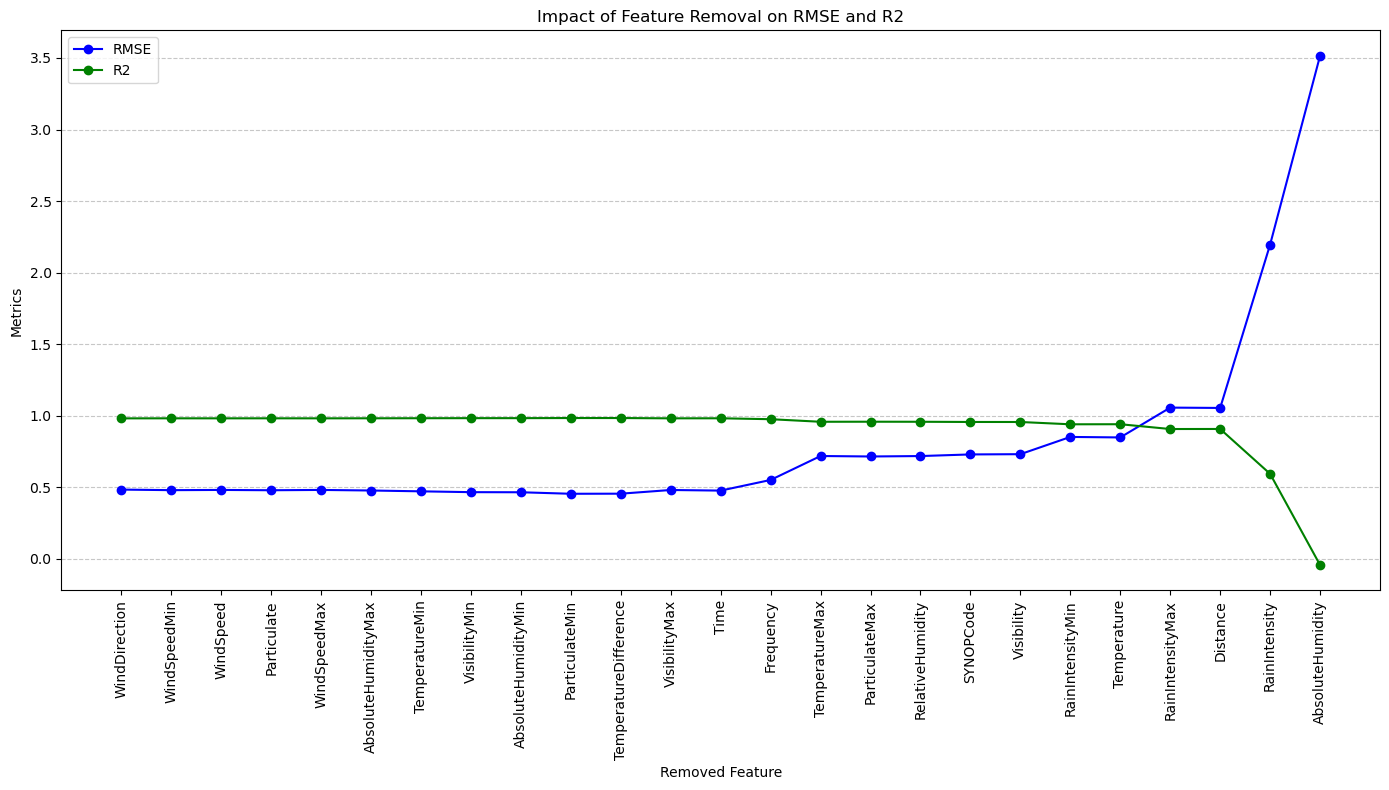

In [48]:


# Plotting
plt.figure(figsize=(14, 8))

# RMSE Plot
plt.plot(results["Removed Feature"], results["RMSE"], marker='o', label="RMSE", color='blue')

# R2 Plot
plt.plot(results["Removed Feature"], results["R2"], marker='o', label="R2", color='green')

# Customizing the plot
plt.xticks(rotation=90)
plt.xlabel("Removed Feature")
plt.ylabel("Metrics")
plt.title("Impact of Feature Removal on RMSE and R2")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig("Feature Importance RFL.png", dpi=300)
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

# Selected features based on importance
selected_features = [
    "AbsoluteHumidity",
    "RainIntensity",
    "Distance",
    "RainIntensityMax",
    "Temperature",
    "RainIntensityMin",
    "Visibility",
    "RelativeHumidity",
    "ParticulateMax",
    "TemperatureMax"
]

def train_rf_model(data, target_variable, selected_features):
    """
    Train a Random Forest model using selected features.
    
    Parameters:
        data (pd.DataFrame): The dataset containing features and the target variable.
        target_variable (str): The name of the target variable column.
        selected_features (list): List of selected features for training.
    
    Returns:
        RandomForestRegressor: The trained Random Forest model.
        dict: Evaluation metrics (RMSE and R²) on the test set.
    """
    # Filter the data for the selected features and target variable
    X = data[selected_features]
    y = data[target_variable]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the Random Forest Regressor
    rf = RandomForestRegressor(random_state=42)
    
    # Train the model
    rf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Print metrics
    print("Random Forest Model Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    
    return rf, {"RMSE": rmse, "R²": r2}

# Example usage:
# Assuming `data` is your dataset and 'RFL_Att' is the target variable
rf_model, metrics = train_rf_model(rfl_df, target_variable='RFL_Att', selected_features=selected_features)


Random Forest Model Performance:
RMSE: 0.7073
R²: 0.9578


In [11]:
def feature_selection_by_synop(data, target_variable, top_n=10):
    """
    Run the feature selection algorithm for each SYNOPCode.
    
    Parameters:
        data (pd.DataFrame): The dataset containing features and the target variable.
        target_variable (str): The name of the target variable column.
        top_n (int): Number of top features to keep for each SYNOPCode.
        
    Returns:
        dict: A dictionary where keys are SYNOPCodes and values are DataFrames
              containing the top features, RMSE, and R² values for each code.
    """
    # Extract unique SYNOPCodes
    synop_codes = data['SYNOPCode'].unique()
    
    # Dictionary to store results for each SYNOPCode
    synop_results = {}
    
    for code in synop_codes:
        print(f"Processing SYNOPCode: {code}")
        
        # Filter the dataset for the current SYNOPCode
        subset_data = data[data['SYNOPCode'] == code]
        
        # Separate features and target variable
        X = subset_data.drop(columns=[target_variable, 'SYNOPCode'])
        y = subset_data[target_variable]
        
        # Initialize an empty table R
        R = []
        
        # List of predictor variables S
        S = list(X.columns)
        
        while S:
            # Train a Random Forest model using the features in S
            rf = RandomForestRegressor(random_state=42, oob_score=True)
            rf.fit(X[S], y)
            
            # Calculate RMSE and R^2 values
            y_pred = rf.oob_prediction_
            rmse = np.sqrt(mean_squared_error(y, y_pred))
            r2 = r2_score(y, y_pred)
            
            # Get feature importances
            feature_importances = rf.feature_importances_
            
            # Identify the least important predictor
            least_important_index = np.argmin(feature_importances)
            least_important_feature = S[least_important_index]
            
            # Add the removed feature and its metrics to the table
            R.append((least_important_feature, rmse, r2))
            
            # Remove the least important feature from S
            S.pop(least_important_index)
        
        # Convert the results to a DataFrame
        results_df = pd.DataFrame(R, columns=["Removed Feature", "RMSE", "R2"])
        
        # Get the top N important features
        top_features = results_df.tail(top_n)
        
        # Store the top features for the current SYNOPCode
        synop_results[code] = top_features
    
    return synop_results

# Example usage:
# Assuming `data` is your dataset and 'RFL_Att' is the target variable
top_features_by_synop = feature_selection_by_synop(data=rfl_df, target_variable='RFL_Att', top_n=10)

# To access results for a specific SYNOPCode, use:



Processing SYNOPCode: 0
Processing SYNOPCode: 6
Processing SYNOPCode: 8
Processing SYNOPCode: 5
Processing SYNOPCode: 3
Processing SYNOPCode: 4
Processing SYNOPCode: 7


In [12]:
synop_codes = rfl_df['SYNOPCode'].unique()
for code in synop_codes:
    print("For SYNOP CODE: ",code)
    print(top_features_by_synop[code])

For SYNOP CODE:  0
        Removed Feature      RMSE        R2
14     RelativeHumidity  0.360535  0.980108
15                 Time  0.357823  0.980406
16        VisibilityMin  0.447265  0.969387
17            Frequency  0.449803  0.969038
18           Visibility  0.626870  0.939864
19          Temperature  0.682454  0.928726
20  AbsoluteHumidityMax  0.850414  0.889327
21  AbsoluteHumidityMin  0.855525  0.887993
22     AbsoluteHumidity  0.872970  0.883378
23             Distance  1.435265  0.684757
For SYNOP CODE:  6
        Removed Feature      RMSE        R2
14  AbsoluteHumidityMax  0.907558  0.949581
15     RelativeHumidity  0.901681  0.950232
16       ParticulateMin  0.934665  0.946524
17             Distance  0.936565  0.946306
18           Visibility  1.105842  0.925143
19          Temperature  1.307425  0.895364
20     RainIntensityMax  1.718177  0.819289
21     RainIntensityMin  1.727082  0.817412
22     AbsoluteHumidity  1.731722  0.816429
23        RainIntensity  3.222850  0.3

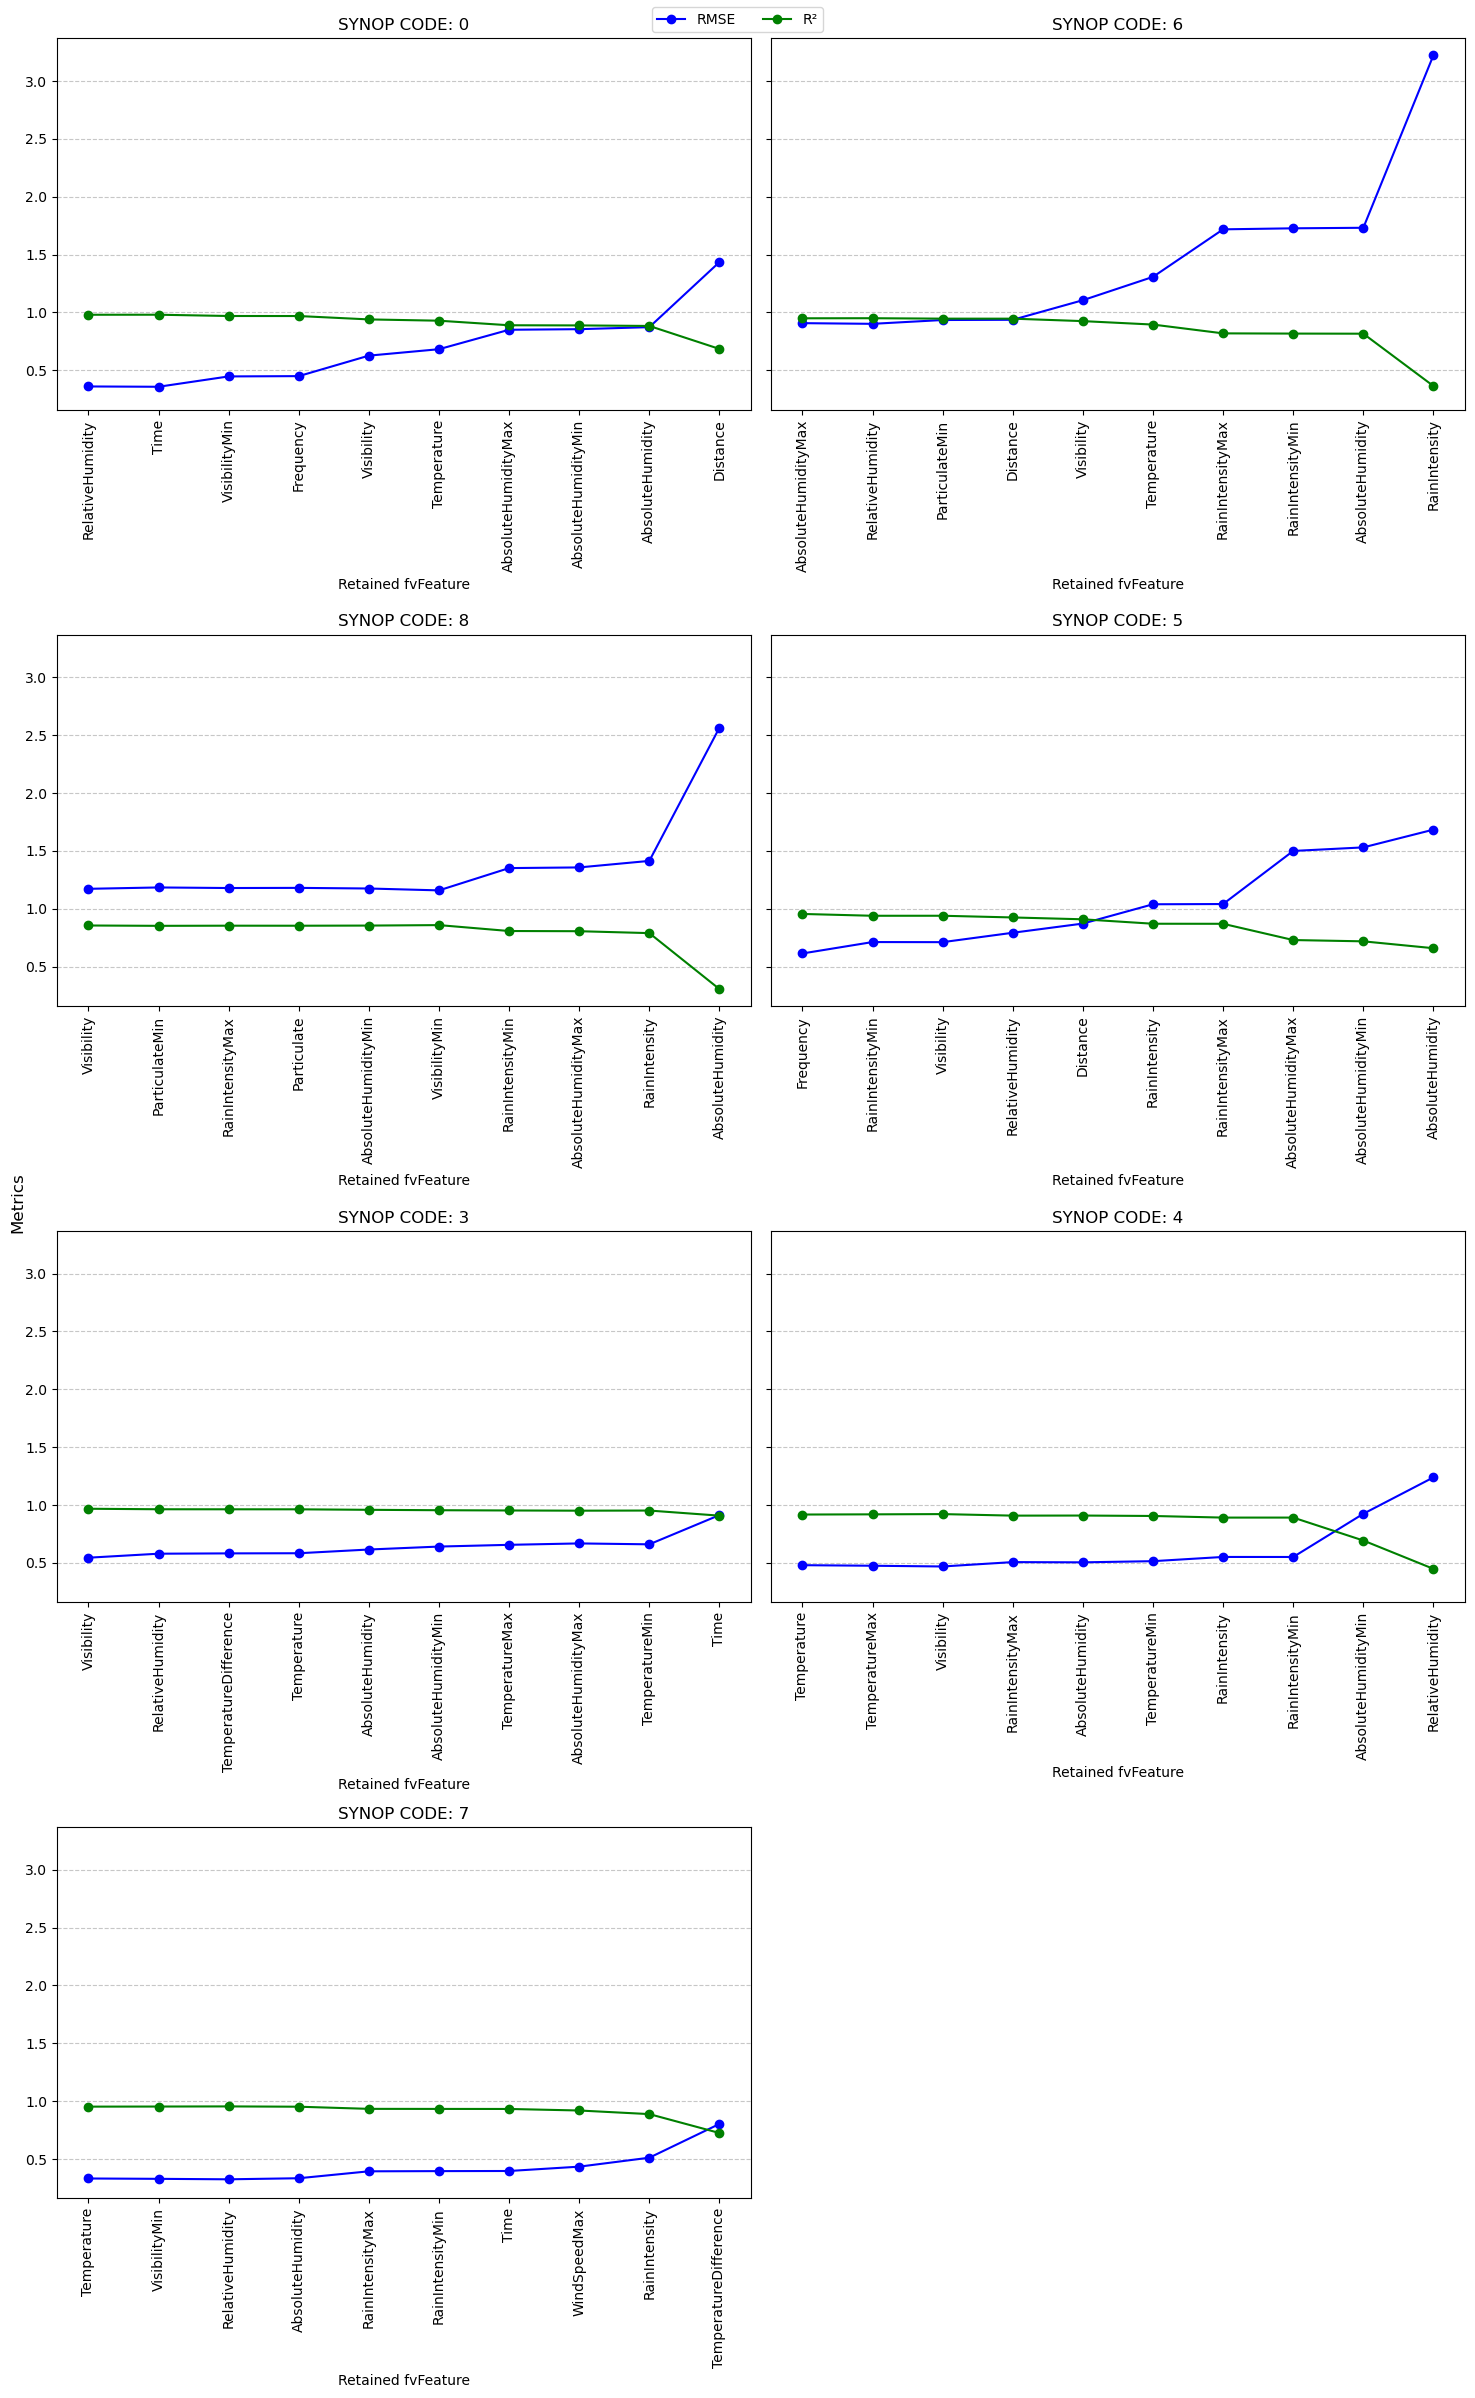

In [46]:
import matplotlib.pyplot as plt
import math

# Assuming `synop_codes` is a list of unique SYNOP codes
# Assuming `top_features_by_synop` is a dictionary with SYNOP codes as keys and DataFrames as values

# Calculate the number of rows needed (2 plots per row)
n_cols = 2
n_rows = math.ceil(len(synop_codes) / n_cols)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6 * n_rows), sharey=True)

# Flatten the axes array to iterate easily, in case of multiple rows
axes = axes.flatten()

# Loop through each SYNOP code and corresponding subplot
for idx, code in enumerate(synop_codes):
    # Get the DataFrame for the current SYNOP code
    df = top_features_by_synop[code]

    # Plot for the current SYNOP Code
    axes[idx].plot(df["Removed Feature"], df["RMSE"], marker='o', label="RMSE", color='blue')
    axes[idx].plot(df["Removed Feature"], df["R2"], marker='o', label="R²", color='green')

    # Customizing the subplot
    axes[idx].set_title(f"SYNOP CODE: {code}")
    axes[idx].set_xlabel("Retained fvFeature")
    axes[idx].tick_params(axis='x', rotation=90)
    axes[idx].grid(axis='y', linestyle='--', alpha=0.7)

# Hide any unused axes if the number of plots is less than available subplots
for i in range(len(synop_codes), len(axes)):
    fig.delaxes(axes[i])

# Set the common Y-label and legend
fig.supylabel("Metrics")
fig.tight_layout()
fig.legend(["RMSE", "R²"], loc='upper center', ncol=2)

plt.savefig("Feature Importance RFL (SYNOPCODE).png", dpi=300)

# Show the plot
plt.show()


In [13]:
def train_rf_by_synop(data, target_variable, top_features_by_synop):
    """
    Train Random Forest models for each SYNOPCode using their top features.
    
    Parameters:
        data (pd.DataFrame): The dataset containing features and the target variable.
        target_variable (str): The name of the target variable column.
        top_features_by_synop (dict): A dictionary containing top features for each SYNOPCode.
        
    Returns:
        dict: A dictionary where keys are SYNOPCodes and values are the model performance
              (RMSE and R² values) for each code.
    """
    # Dictionary to store model performance for each SYNOPCode
    synop_performance = {}
    
    for code, top_features_df in top_features_by_synop.items():
        print(f"Training RF Model for SYNOPCode: {code}")
        
        # Extract top features for the current SYNOPCode
        top_features = top_features_df['Removed Feature'].tolist()
        
        # Filter the dataset for the current SYNOPCode
        subset_data = data[data['SYNOPCode'] == code]
        
        # Prepare training data
        X = subset_data[top_features]
        y = subset_data[target_variable]
        
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Initialize and train the Random Forest model
        rf = RandomForestRegressor(random_state=42)
        rf.fit(X_train, y_train)
        
        # Make predictions
        y_pred = rf.predict(X_test)
        
        # Calculate RMSE and R²
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Store the performance metrics
        synop_performance[code] = {"RMSE": rmse, "R2": r2}
        
        print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")
    
    return synop_performance

# Example usage:
# Assuming `data` is your dataset, 'RFL_Att' is the target variable, and `top_features_by_synop`
# is the dictionary returned by the feature_selection_by_synop function.

synop_performance = train_rf_by_synop(data=rfl_df, target_variable='RFL_Att', top_features_by_synop=top_features_by_synop)

# Example to access results:
print(synop_performance)


Training RF Model for SYNOPCode: 0
RMSE: 0.3826, R²: 0.9777
Training RF Model for SYNOPCode: 6
RMSE: 0.9235, R²: 0.9460
Training RF Model for SYNOPCode: 8
RMSE: 1.2906, R²: 0.8055
Training RF Model for SYNOPCode: 5
RMSE: 0.6562, R²: 0.9500
Training RF Model for SYNOPCode: 3
RMSE: 0.4549, R²: 0.9808
Training RF Model for SYNOPCode: 4
RMSE: 0.4701, R²: 0.9224
Training RF Model for SYNOPCode: 7
RMSE: 0.2816, R²: 0.9571
{0: {'RMSE': 0.38261676616897083, 'R2': 0.9777016631886408}, 6: {'RMSE': 0.9234979938400381, 'R2': 0.9459575659219686}, 8: {'RMSE': 1.2906473055237593, 'R2': 0.8055162337885409}, 5: {'RMSE': 0.6562476286667086, 'R2': 0.9499742666568939}, 3: {'RMSE': 0.4548820756856857, 'R2': 0.9808197219447652}, 4: {'RMSE': 0.4700704103952425, 'R2': 0.9223631499482916}, 7: {'RMSE': 0.2816352256646249, 'R2': 0.957135534510936}}


In [14]:
rmse_values = [metrics["RMSE"] for metrics in synop_performance.values()]
r2_values = [metrics["R2"] for metrics in synop_performance.values()]
    
# Calculate averages
avg_rmse = sum(rmse_values) / len(rmse_values)
avg_r2 = sum(r2_values) / len(r2_values)
    
print("Average RMSE: ", avg_rmse, "\nAverage R²: ", avg_r2)

Average RMSE:  0.6370853437064329 
Average R²:  0.9342097337085767
